In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm


from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
# load data
df = pd.read_csv("heart.csv")


In [3]:
df.head()
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


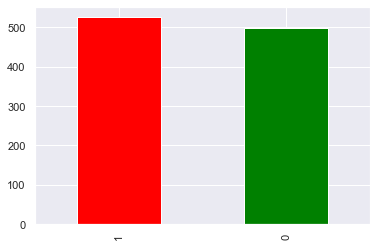

In [4]:
df["target"].value_counts().plot(kind = "bar", color = ["red","green"]);


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

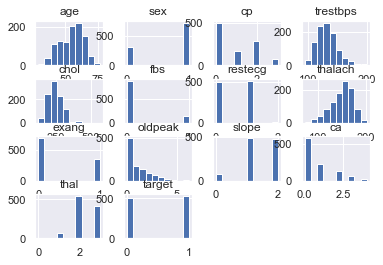

In [5]:
df.hist()

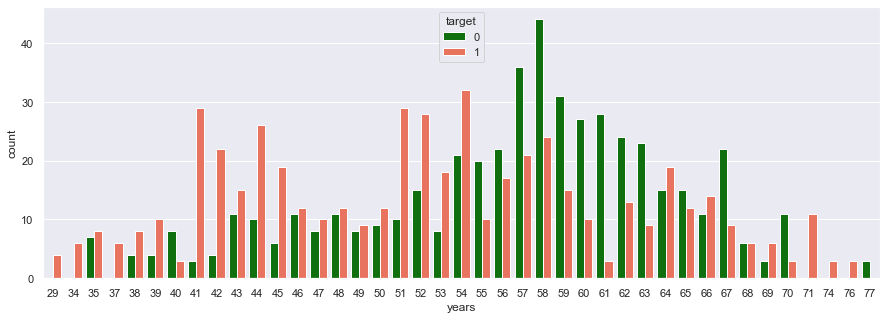

In [6]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 15, 5
df['years'] = (df['age']).round().astype('int')
sns.countplot(x='years', hue='target', data = df, palette=["#008000", "#FF6347"]);

In [7]:
#As depicts in fig 2, the red color represents people suffering from cardiovascular disease
#while the green color represents people who are not suffering from the disease.
#According to the graph it can be clearly seen that people with the age range from 56 to 60 are 
#more exposed to the disease.

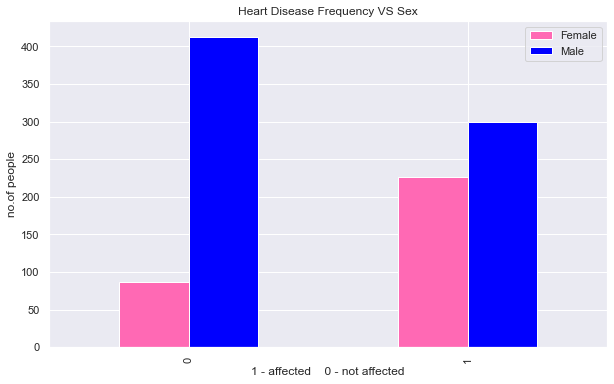

In [8]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",
                                                         figsize = (10,6),
                                                         color=["hotpink","blue"]);
plt.title("Heart Disease Frequency VS Sex")
plt.xlabel("1 - affected    0 - not affected")
plt.ylabel("no.of people")
plt.legend(["Female","Male"]);

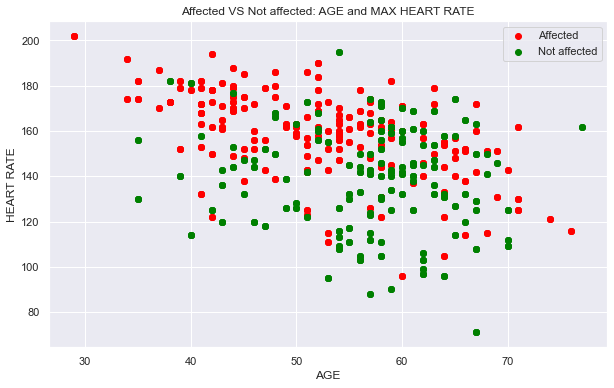

In [9]:
# Scatter plot
plt.figure(figsize = (10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
            c="red")

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c="green")

# Labeling
plt.title("Affected VS Not affected: AGE and MAX HEART RATE")
plt.xlabel("AGE")
plt.ylabel("HEART RATE")
plt.legend(["Affected","Not affected"]);

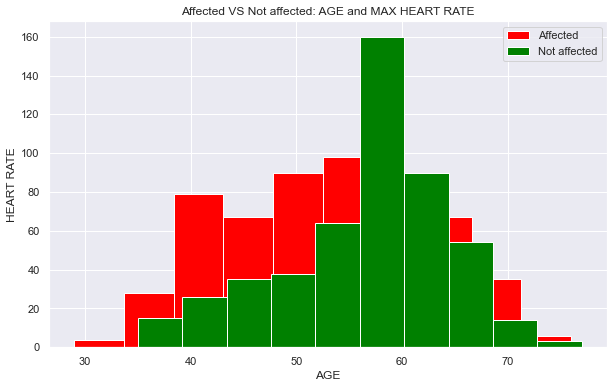

In [10]:
# Scatter plot
plt.figure(figsize = (10,6))

# Scatter with positive examples
plt.hist(df.age[df.target == 1],color ="red")
plt.hist(df.age[df.target == 0],color ="green")
# Labeling
plt.title("Affected VS Not affected: AGE and MAX HEART RATE")
plt.xlabel("AGE")
plt.ylabel("HEART RATE")
plt.legend(["Affected","Not affected"]);



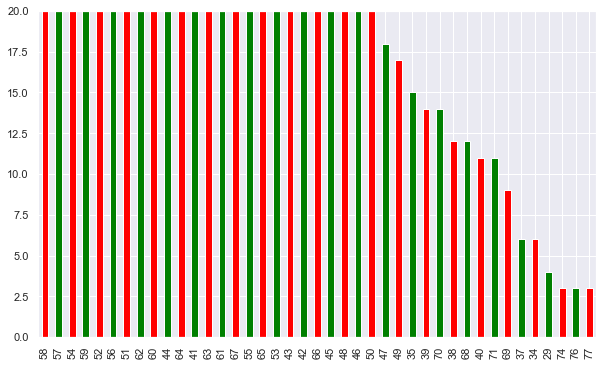

In [11]:
plt.figure(figsize = (10,6))
plt.axis([50,80,0,20])
df["age"].value_counts().plot(kind = "bar", color = ["red","green"]);

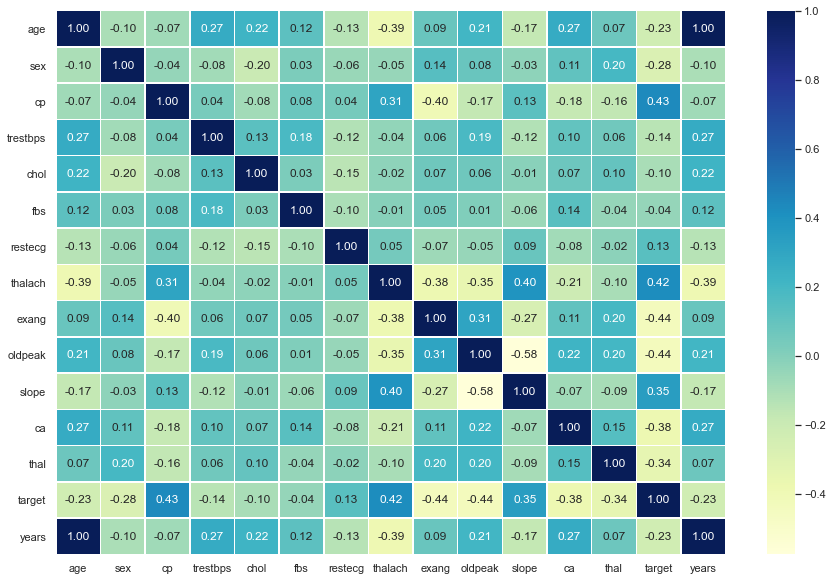

In [12]:
# Visual format
corr_mat = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
years       0
dtype: int64

In [14]:
df.shape
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'years'],
      dtype='object')

In [15]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,years
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,34
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,50
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,46
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0,55
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,59
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,60
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,47
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,50


In [16]:
y = df['target']
X = df.drop(['target','years'], axis = 1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Minimum error:- 0.0 at K = 1


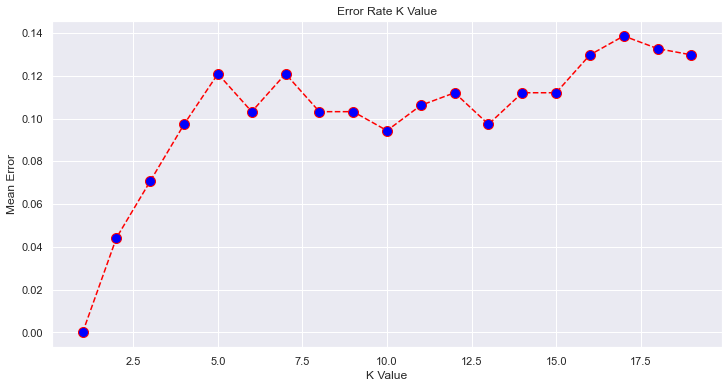

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.33, random_state=0)
   
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  


print(type(X_train))
print(type(X_test))

#looking for the optimistic k value
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [18]:
# Running KNN model
classifier= KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)
y_pred_knn= classifier.predict(X_test) 
 
cm= confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

precision_knn,recall_knn,fscore_knn,support_knn=score(y_test,y_pred_knn,average='macro')
print('KNN')
print(f'Accuracy  : {accuracy_knn}')
print(f'Precision : {precision_knn}')
print(f'Recall    : {recall_knn}')
print(f'F-score   : {fscore_knn}')
print(f'Support   : {support_knn}')


KNN
Accuracy  : 0.9292035398230089
Precision : 0.9285540069686411
Recall    : 0.9300825232533744
F-score   : 0.9290250540861191
Support   : None


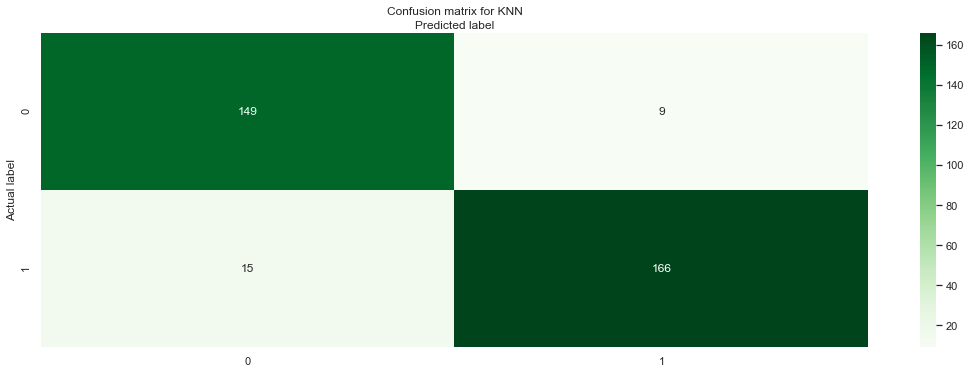

In [19]:
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix_knn), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)

accuracy_nb = (accuracy_score(y_test,y_pred_nb))
precision_nb,recall_nb,fscore_nb,support_nb=score(y_test,y_pred_nb,average='macro')
print('Guassian NB')
print(f'Accuracy  : {accuracy_nb}')
print(f'Precision : {precision_nb}')
print(f'Recall    : {recall_nb}')
print(f'F-score   : {fscore_nb}')
print(f'Support   : {support_nb}')


Guassian NB
Accuracy  : 0.8436578171091446
Precision : 0.8436116382036686
Recall    : 0.8419295055598294
F-score   : 0.8425839123159011
Support   : None


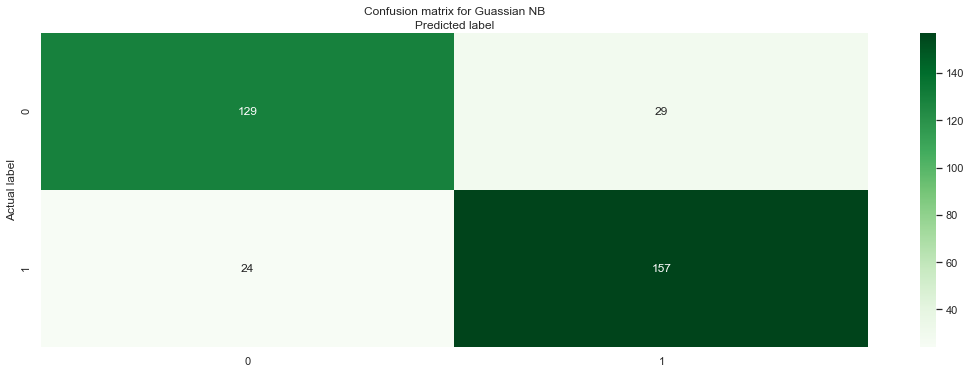

In [21]:
confusion_matrix_nb = confusion_matrix(y_test,y_pred_nb)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix_nb), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Guassian NB')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_lr=logreg.predict(X_test)

accuracy_lr = accuracy_score(y_test,y_pred_lr)


precision_lr,recall_lr,fscore_lr,support_lr=score(y_test,y_pred_lr,average='macro')
print('Logistic Regression')
print(f'Accuracy  : {accuracy_lr}')
print(f'Precision : {precision_lr}')
print(f'Recall    : {recall_lr}')
print(f'F-score   : {fscore_lr}')
print(f'Support   : {support_lr}')


Logistic Regression
Accuracy  : 0.8731563421828908
Precision : 0.8770693592122163
Recall    : 0.8695538149520945
F-score   : 0.8715422508525957
Support   : None


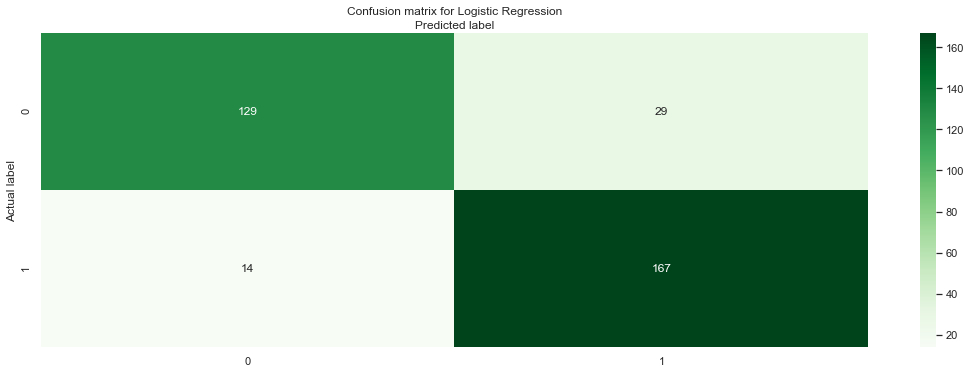

In [23]:
confusion_matrix_lr = confusion_matrix(y_test,y_pred_lr)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix_lr), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
#Decision tree
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)


precision_dt,recall_dt,fscore_dt,support_dt=score(y_test,y_pred_dt,average='macro')
print('Decision Tree')
print(f'Accuracy  : {accuracy_dt}')
print(f'Precision : {precision_dt}')
print(f'Recall    : {recall_dt}')
print(f'F-score   : {fscore_dt}')
print(f'Support   : {support_dt}')


Decision Tree
Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F-score   : 1.0
Support   : None


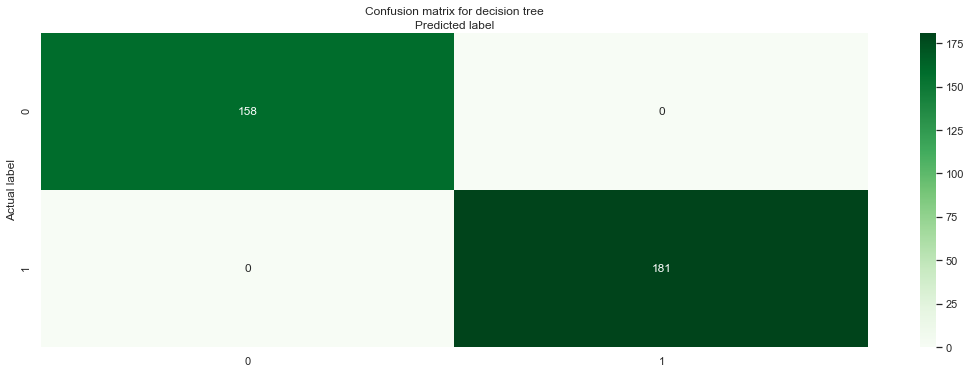

In [25]:
confusion_matrix_dt = confusion_matrix(y_test,y_pred_dt)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix_dt), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
# SVM 
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

# Print accuracy on test data and labels
accuracy_svm = clf.score(X_test, y_test)
precision_svm,recall_svm,fscore_svm,support_svm=score(y_test,y_pred_svm,average='macro')
print('SVM')
print(f'Accuracy  : {accuracy_svm}')
print(f'Precision : {precision_svm}')
print(f'Recall    : {recall_svm}')
print(f'F-score   : {fscore_svm}')
print(f'Support   : {support_svm}')

SVM
Accuracy  : 0.9528023598820059
Precision : 0.9525840967899852
Recall    : 0.9525840967899852
F-score   : 0.9525840967899852
Support   : None


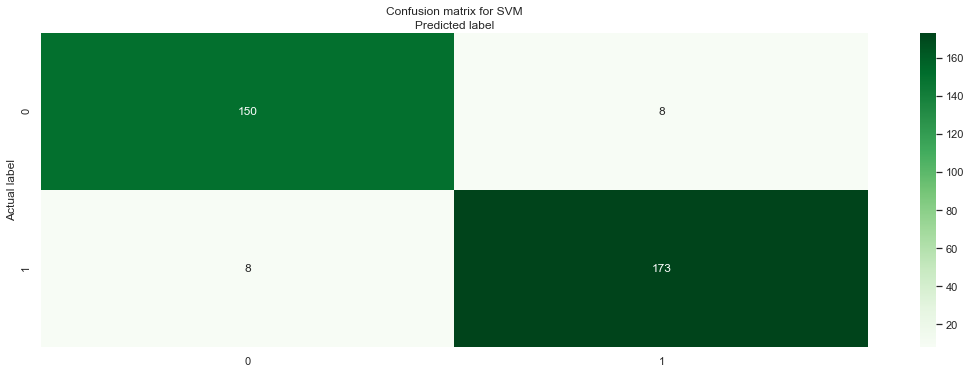

In [27]:
confusion_matrix_svm = confusion_matrix(y_test,y_pred_svm)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix_svm), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

accuracy_rf = model.score(X_test, y_test)
precision_rf,recall_rf,fscore_rf,support_rf=score(y_test,y_pred_rf,average='macro')

print('RandomForestClassifier')
print(f'Accuracy  : {accuracy_rf}')
print(f'Precision : {precision_rf}')
print(f'Recall    : {recall_rf}')
print(f'F-score   : {fscore_rf}')
print(f'Support   : {support_rf}')



RandomForestClassifier
Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
F-score   : 1.0
Support   : None


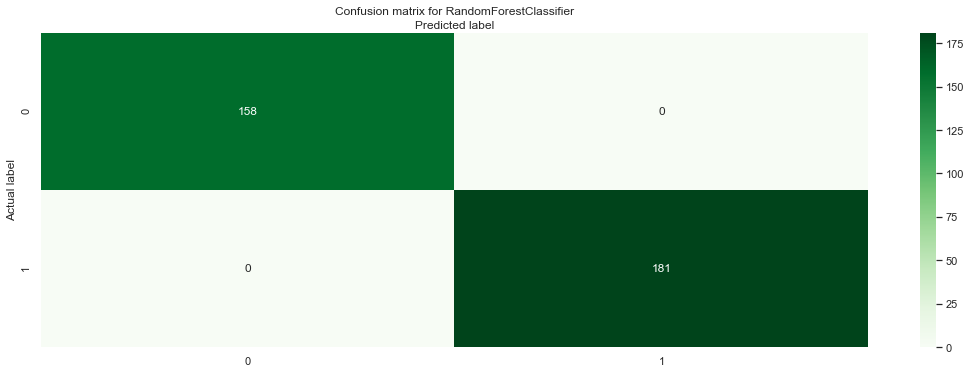

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix_rf), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for RandomForestClassifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

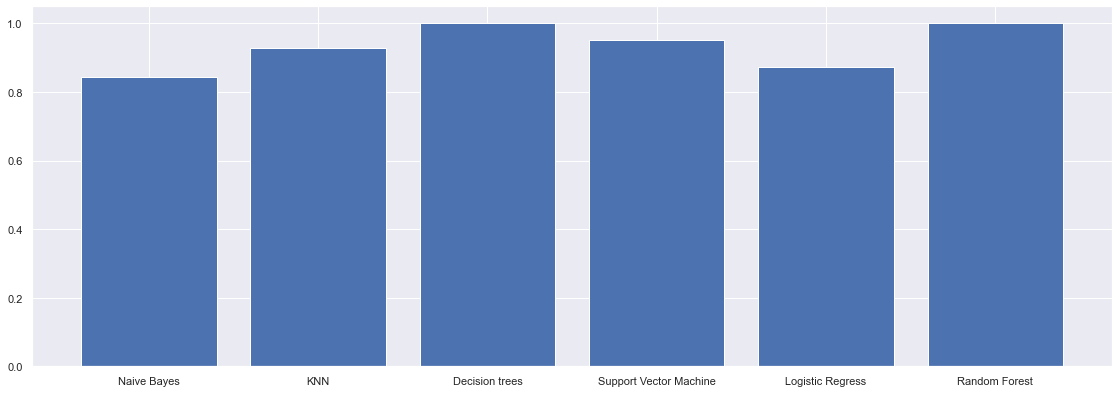

In [30]:
accuracies=[accuracy_nb,accuracy_knn,accuracy_dt,accuracy_svm,accuracy_lr,accuracy_rf]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Naive Bayes', 'KNN', 'Decision trees', 'Support Vector Machine', 'Logistic Regress','Random Forest']

ax.bar(models,accuracies)
plt.show()

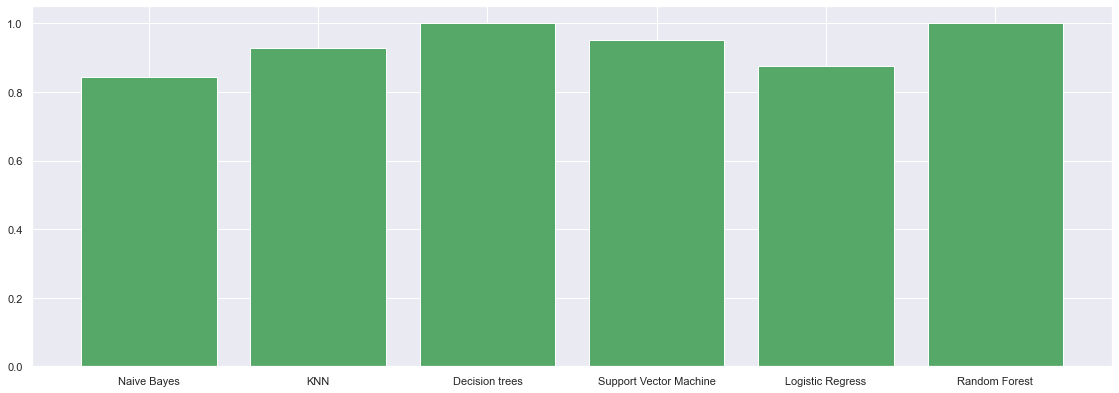

In [31]:
precisions=[precision_nb,precision_knn,precision_dt,precision_svm,precision_lr,precision_rf]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Naive Bayes', 'KNN', 'Decision trees', 'Support Vector Machine', 'Logistic Regress','Random Forest']

ax.bar(models,precisions,color = "g")
plt.show()

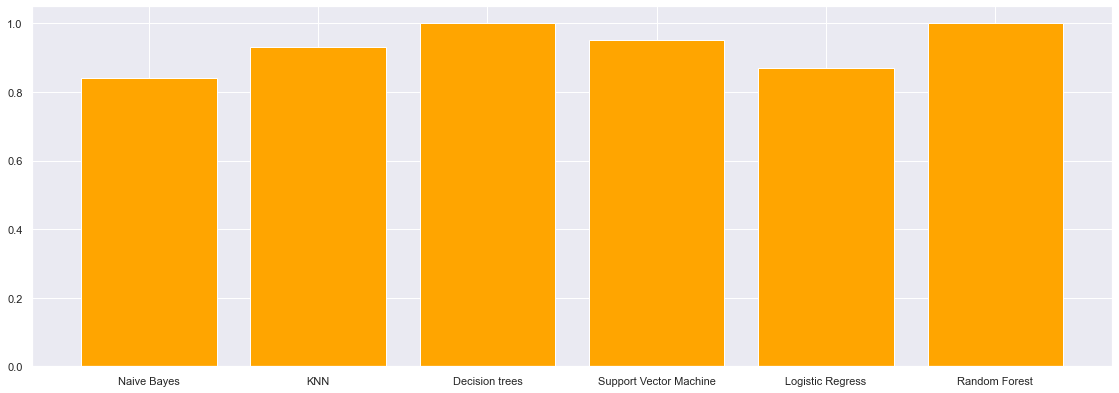

In [32]:
recalls=[recall_nb,recall_knn,recall_dt,recall_svm,recall_lr,recall_rf]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Naive Bayes', 'KNN', 'Decision trees', 'Support Vector Machine', 'Logistic Regress','Random Forest']

ax.bar(models,recalls,color = "orange")
plt.show()

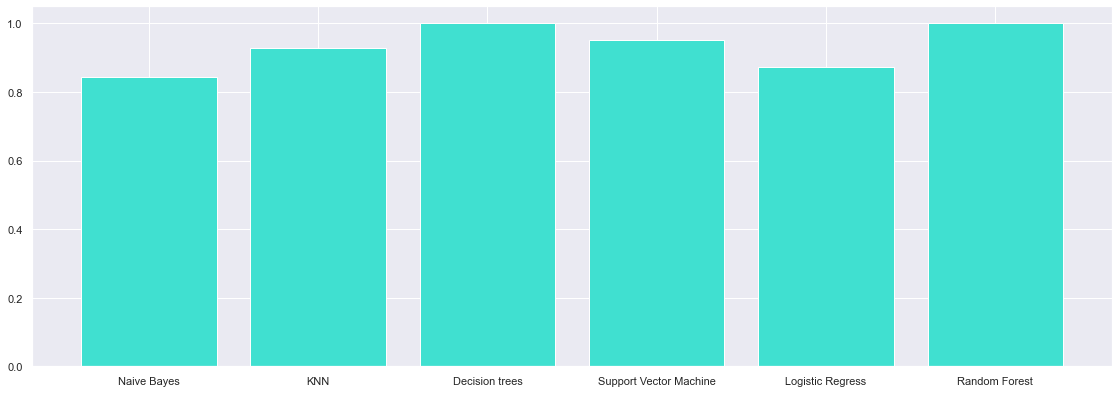

In [33]:
fscores=[fscore_nb,fscore_knn,fscore_dt,fscore_svm,fscore_lr,fscore_rf]


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Naive Bayes', 'KNN', 'Decision trees', 'Support Vector Machine', 'Logistic Regress','Random Forest']

ax.bar(models,fscores,color = "Turquoise")
plt.show()

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
# feature selection
def select_features(X_train, y_train, X_test, number):
    # configure to select a subset of features
    number_features = number
    fs = SelectFromModel(DecisionTreeClassifier(), max_features=number_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
accuracies_lgr = [] 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# feature selection
for number_features in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, number_features)
    # fit the model
    model = DecisionTreeClassifier()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    accuracies_lgr.append(accuracy)
    print(f'number_features: {number_features} Data shape:{X_test_fs.shape} Accuracy: {accuracy*100}')

number_features: 1 Data shape:(257, 1) Accuracy: 76.26459143968872
number_features: 2 Data shape:(257, 2) Accuracy: 87.15953307392996
number_features: 3 Data shape:(257, 3) Accuracy: 95.71984435797665
number_features: 4 Data shape:(257, 4) Accuracy: 98.83268482490273
number_features: 5 Data shape:(257, 5) Accuracy: 100.0
number_features: 6 Data shape:(257, 5) Accuracy: 98.83268482490273
number_features: 7 Data shape:(257, 5) Accuracy: 100.0
number_features: 8 Data shape:(257, 5) Accuracy: 98.83268482490273
number_features: 9 Data shape:(257, 6) Accuracy: 98.83268482490273
number_features: 10 Data shape:(257, 5) Accuracy: 98.83268482490273
number_features: 11 Data shape:(257, 5) Accuracy: 100.0
number_features: 12 Data shape:(257, 6) Accuracy: 100.0
number_features: 13 Data shape:(257, 5) Accuracy: 100.0


In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
# feature selection
def select_features(X_train, y_train, X_test, number):
    # configure to select a subset of features
    number_features = number
    fs = SelectFromModel(DecisionTreeClassifier(), max_features=number_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
accuracies_lgr = [] 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# feature selection
for number_features in range(1,14):
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, number_features)
    # fit the model
    model = GaussianNB()
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    accuracies_lgr.append(accuracy)
    print(f'number_features: {number_features} Data shape:{X_test_fs.shape} Accuracy: {accuracy*100}')

number_features: 1 Data shape:(257, 1) Accuracy: 76.26459143968872
number_features: 2 Data shape:(257, 2) Accuracy: 73.54085603112841
number_features: 3 Data shape:(257, 3) Accuracy: 75.09727626459144
number_features: 4 Data shape:(257, 4) Accuracy: 77.431906614786
number_features: 5 Data shape:(257, 5) Accuracy: 81.32295719844358
number_features: 6 Data shape:(257, 5) Accuracy: 81.32295719844358
number_features: 7 Data shape:(257, 5) Accuracy: 81.32295719844358
number_features: 8 Data shape:(257, 5) Accuracy: 81.32295719844358
number_features: 9 Data shape:(257, 5) Accuracy: 81.32295719844358
number_features: 10 Data shape:(257, 5) Accuracy: 81.32295719844358
number_features: 11 Data shape:(257, 5) Accuracy: 81.32295719844358
number_features: 12 Data shape:(257, 5) Accuracy: 81.32295719844358
number_features: 13 Data shape:(257, 5) Accuracy: 81.32295719844358
